Content and things to discuss are up to you, but we expect (at a minimum):
- Do you have data fully in hand and if not, what blockers are you facing? A: YES
- Have you done a full EDA on all of your data? A: YES
- Have you begun the modeling process? How accurate are your predictions so far? A: NO
- What blockers are you facing, including processing power, data acquisition, modeling difficulties, data cleaning, etc.? How can we help you overcome those challenges? A: figuring out how I want to model it
- Have you changed topics since your lightning talk? Since you submitted your Problem Statement and EDA? If so, do you have the necessary data in hand (and the requisite EDA completed) to continue moving forward? A: NO 
- What is your timeline for the next week and a half? What do you have to get done versus what would you like to get done? A: Figuring out my target and building the model 
- What topics do you want to discuss during your 1:1? A: Project Goals and suggestions

# CAPSTONE PROJECT NOTEBOOOK - PATRICK VALADKA

#https://git.generalassemb.ly/DSI-EAST-1/capstone
-Goal of this project is to predict crime type, location, and date based on the available data

-Chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
-Key columns we're looking at will include: GO Report Date (LabelEncoded day of week and months)
        - GO Highest Offense Desc  [OR]  Highest NIBRS/UCR Offense Description  [label encoded]
        - GO Location Zip for [regression?] about generalized locations of crime [rape/sexual assualt obscured]
        - GO X Coordinate and GO Y Coordinate for location precision for mapping in Tableau  
        
- Use regression(?) around the types of crime, date, and location to establish a crime set to improve APD patrolling
- Motivation: I got broken into and want to determine the ideal location to move to in the near future

In [439]:
# importing some initial plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
# importing packages for running models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, LassoCV, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier


from datetime import datetime
from time import gmtime, strftime
%matplotlib inline

In [41]:
# importing dataset and getting some head
# chose this dataset vs the other because it was more complete in terms of location, crime, and offenses
df = pd.read_csv('./2016_Annual_Crime_Data.csv')
df.head(50)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,2.016110e+08,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724.0,22.08,3146947.0,10077985.0
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741.0,23.16,3118667.0,10060221.0
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741.0,23.18,3122230.0,10059265.0
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704.0,20.04,3099793.0,10058337.0
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748.0,24.21,3095553.0,10035959.0


In [108]:
df['Highest NIBRS/UCR Offense Description'].value_counts()

Theft          26140
Burglary        5163
Agg Assault     2176
Auto Theft      2017
Robbery         1045
Murder            38
Name: Highest NIBRS/UCR Offense Description, dtype: int64

In [109]:
df['GO Highest Offense Desc'].value_counts()

THEFT                             10396
BURGLARY OF VEHICLE                8472
THEFT BY SHOPLIFTING               3418
BURGLARY OF RESIDENCE              3195
AUTO THEFT                         2017
BURGLARY NON RESIDENCE             1642
THEFT OF BICYCLE                   1388
AGG ASSAULT                         902
THEFT FROM AUTO                     654
AGG ASLT STRANGLE/SUFFOCATE         608
AGG ROBBERY/DEADLY WEAPON           578
THEFT OF LICENSE PLATE              474
THEFT FROM PERSON                   446
ROBBERY BY ASSAULT                  357
AGG ASSAULT FAM/DATE VIOLENCE       335
BURG NON RESIDENCE SHEDS            316
THEFT OF AUTO PARTS                 285
THEFT FROM BUILDING                 249
THEFT OF TRAILER                    162
DEADLY CONDUCT                      146
BREACH OF COMPUTER SECURITY          98
ROBBERY BY THREAT                    90
AGG ASSAULT WITH MOTOR VEH           71
AGG ASLT ENHANC STRANGL/SUFFOC       54
THEFT OF METAL                       40


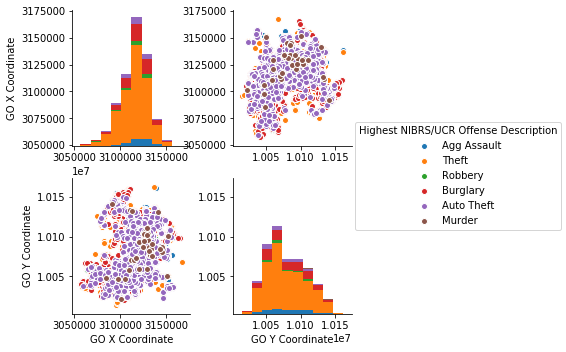

In [115]:
sns.pairplot(df[['GO Highest Offense Desc','GO X Coordinate','GO Y Coordinate','Highest NIBRS/UCR Offense Description']],hue='Highest NIBRS/UCR Offense Description');

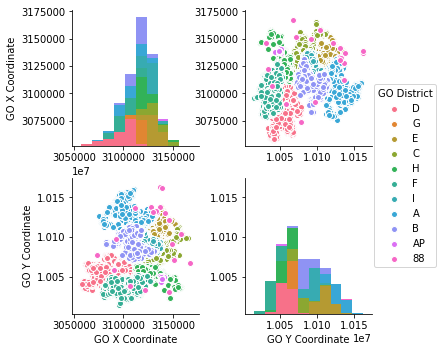

In [116]:
sns.pairplot(df[['GO Highest Offense Desc','GO X Coordinate','GO Y Coordinate','GO District']],hue='GO District');

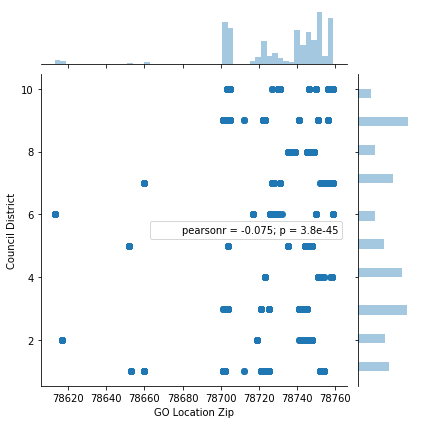

In [515]:
sns.jointplot(x="GO Location Zip", y="Council District", data=df);

In [118]:
df['GO District'].value_counts()

D     5371
E     4674
F     4387
B     4215
I     4170
H     4159
A     4055
C     2774
G     2592
AP     162
88      20
Name: GO District, dtype: int64

In [120]:
df.loc[df['GO District'] == '88']

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day
1356,2.016500e+10,NaN,THEFT,Theft,14-Jan-16,12005 MANAROLA CV ...,NaN,NaN,88,78653,18.56,3158080.0,10103648.0,3,Jan,16,14
1900,2.016500e+10,10.0,THEFT,Theft,19-Jan-16,4102 AQUA VERDE DR ...,NaN,NaN,88,78746,19.12,3092173.0,10097439.0,1,Jan,16,19
2823,2.016280e+09,NaN,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,28-Jan-16,7430 BLUFF SPRINGS RD ...,C,3-Feb-16,88,78744,24.27,3106403.0,10037968.0,3,Jan,16,28
5486,2.016540e+09,NaN,BURGLARY NON RESIDENCE,Burglary,23-Feb-16,13614 DESSAU RD ...,N,24-Feb-16,88,78660,18.40,3146377.0,10121533.0,1,Feb,16,23
6170,2.016501e+10,2.0,AUTO THEFT,Auto Theft,1-Mar-16,7204 GREAT PANDA CV ...,N,28-Mar-16,88,78617,24.35,3146290.0,10030743.0,1,Mar,16,1
7105,2.016702e+09,NaN,BURGLARY OF VEHICLE,Theft,10-Mar-16,15505 N IH 35 SVRD NB ...,N,20-Mar-16,88,78660,18.57,3136965.0,10137452.0,3,Mar,16,10
10983,2.016502e+10,2.0,THEFT,Theft,15-Apr-16,7100 CARDINAL BLOOM LOOP ...,NaN,NaN,88,78744,24.32,3122068.0,10032912.0,4,Apr,16,15
13927,2.016800e+10,NaN,THEFT,Theft,13-May-16,1201 CHARRINGTON DR ...,N,16-Jun-16,88,78664,215.05,3136921.0,10162834.0,4,May,16,13
17784,2.016503e+10,NaN,THEFT BY SHOPLIFTING,Theft,20-Jun-16,4970 W US 290 HWY SVRD WB ...,NaN,NaN,88,78735,19.15,3090168.0,10057831.0,0,Jun,16,20
19073,2.016503e+10,NaN,THEFT,Theft,2-Jul-16,14100 THERMAL DR ...,NaN,NaN,88,78728,18.63,3133401.0,10131474.0,5,Jul,16,2


In [294]:
# checking out null values of columns
df.isnull().sum()

GO Primary Key                              0
Council District                           87
GO Highest Offense Desc                     0
Highest NIBRS/UCR Offense Description       0
GO Report Date                              0
GO Location                                 0
Clearance Status                         1618
Clearance Date                           1618
GO District                                 0
GO Location Zip                             0
GO Census Tract                             0
GO X Coordinate                             0
GO Y Coordinate                             0
weekday                                     0
Month                                       0
Year                                        0
Day                                         0
new_date                                    0
dow                                         0
Day_of_Week                                 0
dtype: int64

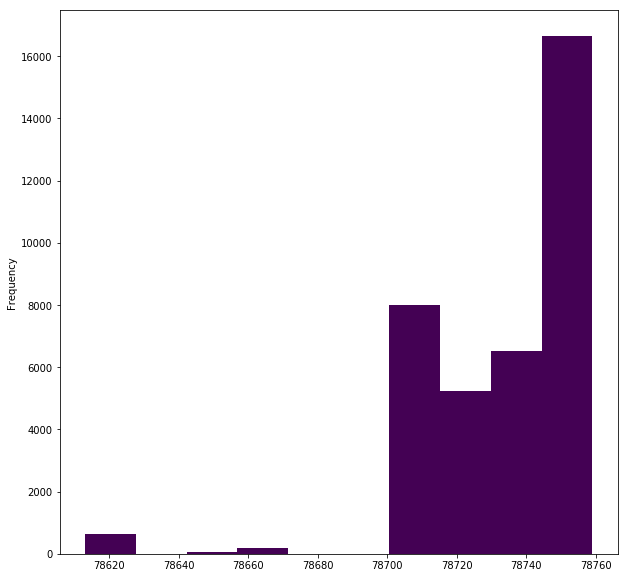

In [43]:
# plotting histogram to determine zip codes as a factor related to crime stats
plt.figure(figsize=(10,10))
df['GO Location Zip'].plot(kind='hist', colormap='viridis')
# inherently round rock and westlake have 0 data as they are other cities.. 
# did not expect much impact from these two anyway as they are relatively safe.
# need to get it into each zip code...

In [44]:
# plot location based crime

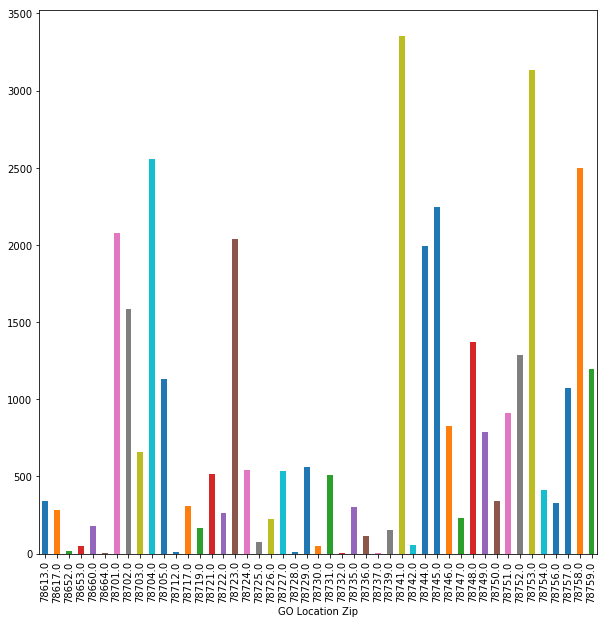

In [45]:
plt.figure(figsize=(10,10))
df.groupby('GO Location Zip').size().plot(kind='bar')
plt.show()

ValueError: color kwarg must have one color per dataset

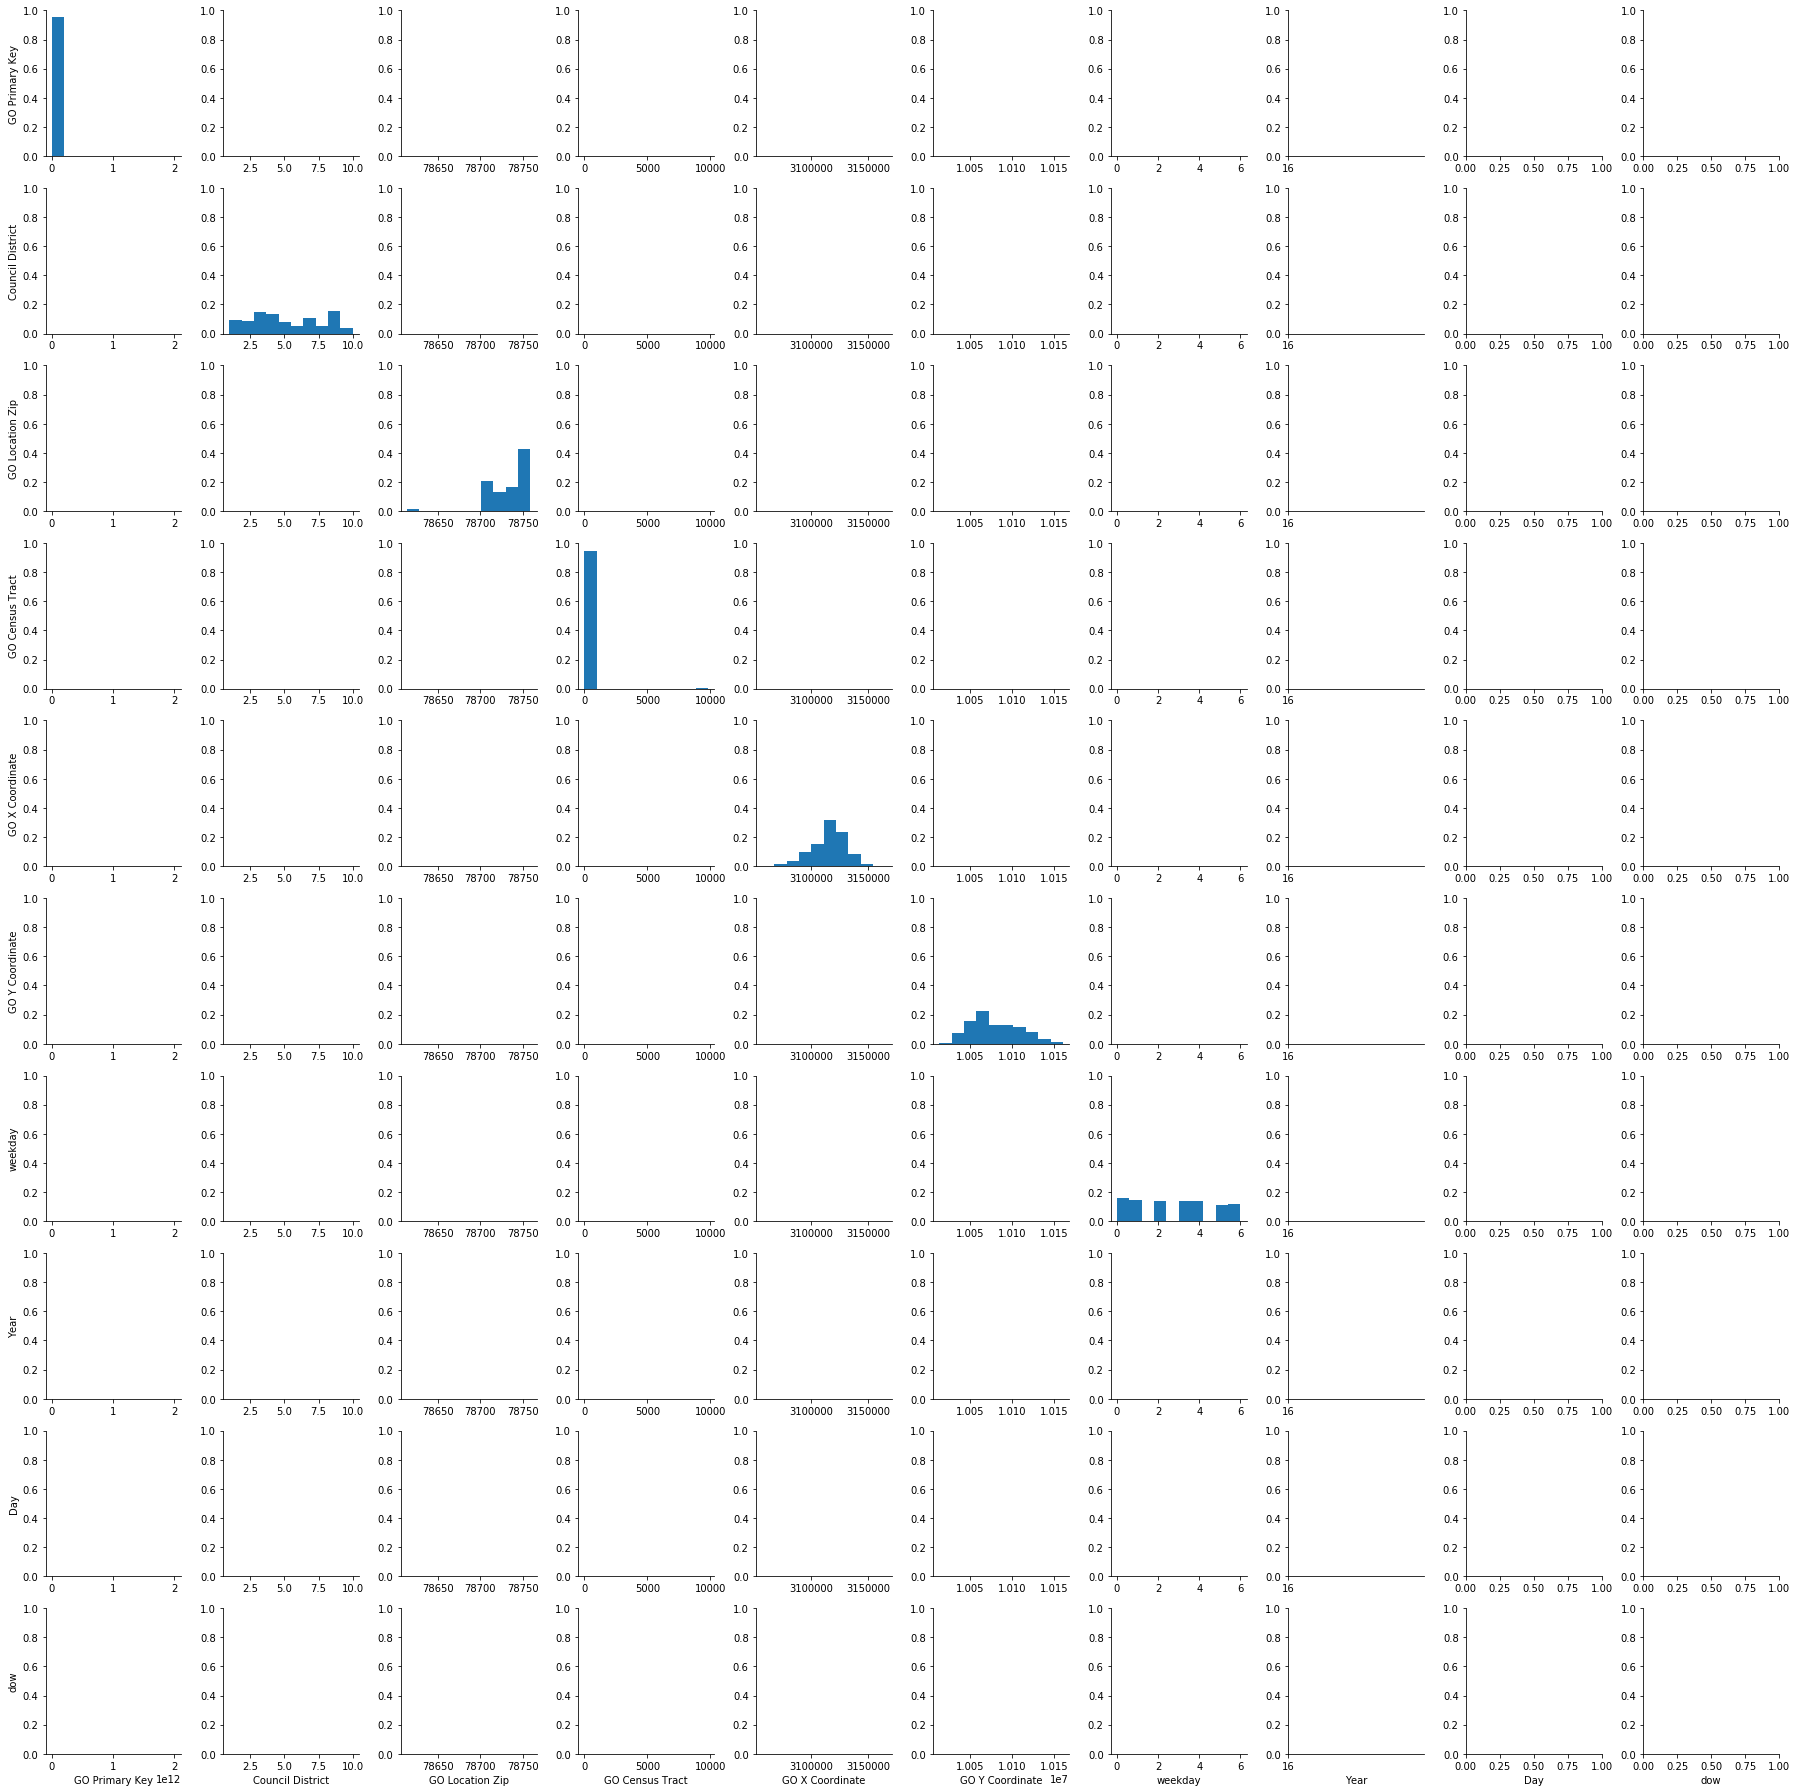

In [312]:
# scatter plot

sns.pairplot(df[]);

# START TRANSFORMING DATA 
- drop all the nulls for the GO Location Zip, GO Census Tract, GO X Coordinate, GO Y Coordinate
- drop the GO Primary Key and Clearance Date columns because they are basically useless
- create LabelEncoder columns for the days and months on the dataset
- change all NaN values for the Clearance Status to "N" 
- drop the .0 value off of the Go Location Zip column

In [46]:
# drop the GO Primary Key and Clearance Date columns because they are basically useless
#df.drop(['GO Primary Key','Clearance Date'], axis=1, inplace=True)

In [47]:
df.head(2)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0


In [48]:
# drop the na values from Zip
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['GO Location Zip'],how='all', inplace = True)

In [49]:
# transforming the zip location
df['GO Location Zip'] =  df['GO Location Zip'].astype('int32')

In [50]:
#recheck all nan are gone
df['GO Location Zip'].isnull().sum()

0

In [51]:
df.head(2)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0


In [295]:
# drop the na values from X and Y coordinate
#df.dropna(subset = ['column_name'])
df.dropna(subset = ['Council District'],how='all', inplace = True)

In [300]:
df.isnull().sum()

GO Primary Key                           0
Council District                         0
GO Highest Offense Desc                  0
Highest NIBRS/UCR Offense Description    0
GO Report Date                           0
GO Location                              0
Clearance Status                         0
Clearance Date                           0
GO District                              0
GO Location Zip                          0
GO Census Tract                          0
GO X Coordinate                          0
GO Y Coordinate                          0
weekday                                  0
Month                                    0
Year                                     0
Day                                      0
new_date                                 0
dow                                      0
Day_of_Week                              0
dtype: int64

In [ ]:
df.dropna(subset = ['GO X Coordinate','GO Y Coordinate'],how='all', inplace = True)

In [298]:
df.dropna(subset = ['Clearance Status'],how='all', inplace = True)

In [125]:
# converting the GO Report Date to day, month
# 0 index starting on monday
df['weekday'] = pd.DatetimeIndex(df['GO Report Date']).dayofweek

In [149]:
df.head(1000)
# 0= monday
# 1= tuesday
# 2= wednesday
# 3= thursday
# 4= friday
# 5= saturday 
# 6= sunday

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day,new_date
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,Jan,16,1,2016-01-01
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,Jan,16,1,2016-01-01
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,Jan,16,1,2016-01-01
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,Jan,16,1,2016-01-01
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,Jan,16,1,2016-01-01
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,23.16,3118667.0,10060221.0,4,Jan,16,1,2016-01-01
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,23.18,3122230.0,10059265.0,4,Jan,16,1,2016-01-01
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,20.04,3099793.0,10058337.0,4,Jan,16,1,2016-01-01
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,24.21,3095553.0,10035959.0,4,Jan,16,1,2016-01-01
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,18.20,3121931.0,10106738.0,4,Jan,16,1,2016-01-01


In [145]:
df['new_date'] = pd.to_datetime(df['GO Report Date'])
pd.Timestamp(df.new_date[0]).dayofweek


4

In [154]:
# for loop to determine day of week of 'Go Report Date'

df['dow']=df['new_date'].dt.dayofweek

df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day,new_date,dow
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,Jan,16,1,2016-01-01,4
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,Jan,16,1,2016-01-01,4
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,Jan,16,1,2016-01-01,4
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,Jan,16,1,2016-01-01,4
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,Jan,16,1,2016-01-01,4


In [161]:
df['Day_of_Week'] = pd.to_datetime(df['new_date'], format='%y/%m/%d').dt.weekday_name

df.head(1000)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day,new_date,dow,Day_of_Week
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,Jan,16,1,2016-01-01,4,Friday
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,Jan,16,1,2016-01-01,4,Friday
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,Jan,16,1,2016-01-01,4,Friday
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,Jan,16,1,2016-01-01,4,Friday
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,Jan,16,1,2016-01-01,4,Friday
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,23.16,3118667.0,10060221.0,4,Jan,16,1,2016-01-01,4,Friday
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,23.18,3122230.0,10059265.0,4,Jan,16,1,2016-01-01,4,Friday
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,20.04,3099793.0,10058337.0,4,Jan,16,1,2016-01-01,4,Friday
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,24.21,3095553.0,10035959.0,4,Jan,16,1,2016-01-01,4,Friday
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,18.20,3121931.0,10106738.0,4,Jan,16,1,2016-01-01,4,Friday


In [157]:
df.loc[df['GO Report Date'] == '3-Jan-16']


,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day,new_date,dow
160,2.016214e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,3-Jan-16,907 E ST JOHNS AVE ...,C,27-Apr-16,I,78752,18.12,3126837.0,10094024.0,6,Jan,16,3,2016-01-03,6
161,2.016300e+08,5.0,THEFT,Theft,3-Jan-16,1342 LAMAR SQUARE DR ...,N,5-Jan-16,D,78704,13.03,3107726.0,10065373.0,6,Jan,16,3,2016-01-03,6
162,2.016300e+08,1.0,AGG ASSAULT,Agg Assault,3-Jan-16,11100 BLOCK N IH 35 SVRD NB ...,N,26-Feb-16,E,78753,18.33,3134137.0,10110134.0,6,Jan,16,3,2016-01-03,6
163,2.016301e+08,3.0,AGG ASSAULT,Agg Assault,3-Jan-16,N IH 35 SVRD NB / E CESAR CHAVEZ ST ...,N,30-Jun-16,G,78702,9.02,3116588.0,10068234.0,6,Jan,16,3,2016-01-03,6
164,2.016301e+08,3.0,BURGLARY OF VEHICLE,Theft,3-Jan-16,2425 ELMONT DR ...,C,3-Jan-16,H,78741,23.04,3121195.0,10060509.0,6,Jan,16,3,2016-01-03,6
165,2.016301e+08,2.0,AGG ASSAULT,Agg Assault,3-Jan-16,4509 E ST ELMO RD ...,N,4-Jan-16,F,78744,24.13,3116165.0,10048034.0,6,Jan,16,3,2016-01-03,6
166,2.016301e+08,7.0,THEFT,Theft,3-Jan-16,2600 GRACY FARMS LN ...,N,19-Jan-16,A,78758,18.49,3123063.0,10120908.0,6,Jan,16,3,2016-01-03,6
167,2.016302e+08,1.0,THEFT,Theft,3-Jan-16,1815 CORONADO HILLS DR ...,N,13-Jan-16,I,78752,18.11,3132414.0,10091710.0,6,Jan,16,3,2016-01-03,6
168,2.016302e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,3-Jan-16,1100 REINLI ST ...,N,3-May-16,I,78723,21.05,3126350.0,10088845.0,6,Jan,16,3,2016-01-03,6
169,2.016304e+08,4.0,THEFT,Theft,3-Jan-16,1030 NORWOOD PARK BLVD ...,C,22-Jan-16,I,78753,18.13,3129997.0,10096983.0,6,Jan,16,3,2016-01-03,6


In [305]:
df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day,new_date,dow,Day_of_Week
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,Jan,16,1,2016-01-01,4,Friday
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,Jan,16,1,2016-01-01,4,Friday
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,Jan,16,1,2016-01-01,4,Friday
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,Jan,16,1,2016-01-01,4,Friday
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,Jan,16,1,2016-01-01,4,Friday


In [152]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2016, 12, 31)
end_date = date(2017, 1, 1)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))

2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-07
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
2016-02-21
2016-02-22
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-19
2016-03-20
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30

In [130]:
#df['weekday_name'] = df['weekday'].dt.weekday_name

In [128]:
df["Month"]=df["GO Report Date"].map(lambda x: x.split("-")[1])
df["Year"]=df["GO Report Date"].map(lambda x: x.split("-")[2])
df["Day"]=df["GO Report Date"].map(lambda x: x.split("-")[0])

In [129]:
df.head(10000)

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,Month,Year,Day
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,19.08,3067322.0,10062796.0,4,Jan,16,1
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,11.00,3114957.0,10070462.0,4,Jan,16,1
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,18.23,3129181.0,10106923.0,4,Jan,16,1
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,11.00,3113643.0,10070357.0,4,Jan,16,1
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,22.08,3146947.0,10077985.0,4,Jan,16,1
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,23.16,3118667.0,10060221.0,4,Jan,16,1
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,23.18,3122230.0,10059265.0,4,Jan,16,1
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,20.04,3099793.0,10058337.0,4,Jan,16,1
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,24.21,3095553.0,10035959.0,4,Jan,16,1
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,18.20,3121931.0,10106738.0,4,Jan,16,1


In [28]:
#Make my months, day and years into ints than strings.
#df['Month'] = df['Month'].astype(str).astype(int)
#df['Day'] = df['Day'].astype(str).astype(int)
#df['Year'] = df['Year'].astype(str).astype(int)

In [59]:
#.map current val jan maps ton one
#df[month_num] = df.Month.str.upper().map()

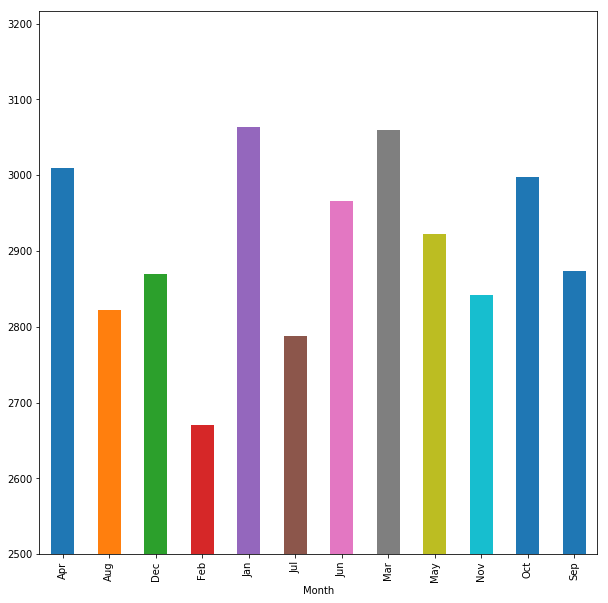

In [564]:
plt.figure(figsize=(10,10))
df.groupby('Month').size().plot(kind='bar')
plt.ylim(ymin=2500)
plt.show()
#crime breakout to zip  by crime

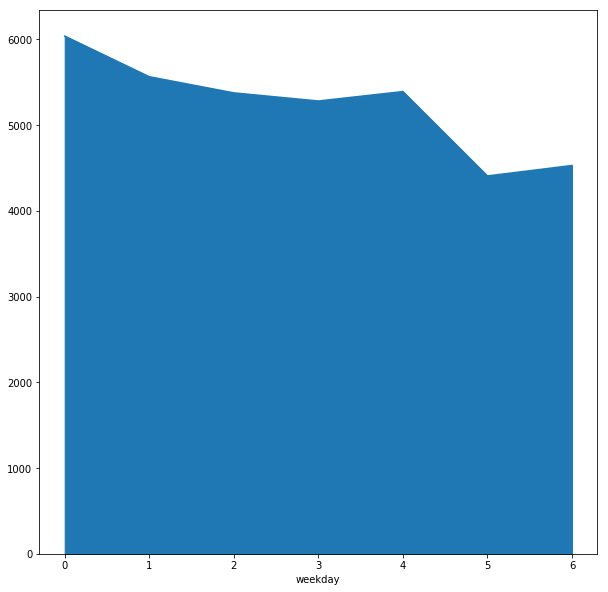

In [61]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('weekday').size().plot(kind='area')
plt.show()

In [ ]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('weekday').size().plot(kind='area')
plt.show()

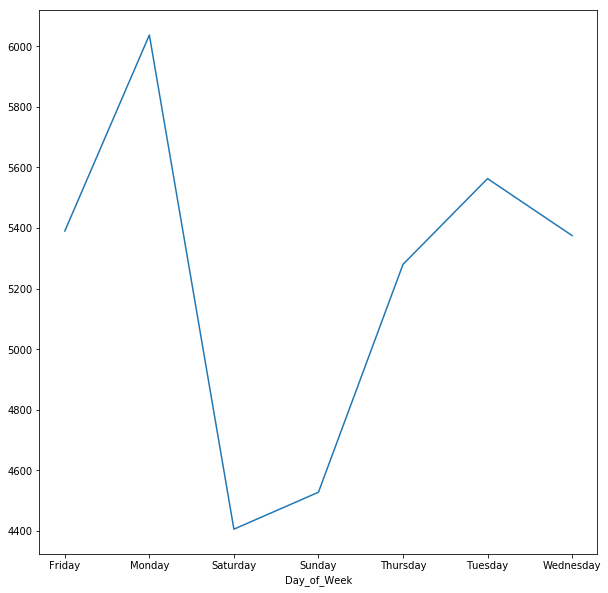

In [164]:
# starting at 0 = monday to 6 = sunday
plt.figure(figsize=(10,10))
df.groupby('Day_of_Week').size().plot(kind='line')
plt.show()

In [ ]:
# plt hist of Highest NIBRS/UCR Offense Description 



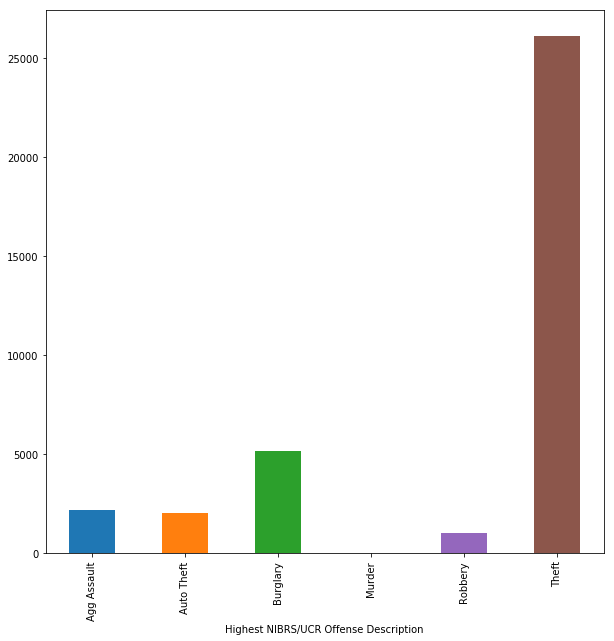

In [62]:
plt.figure(figsize=(10,10))
df.groupby('Highest NIBRS/UCR Offense Description').size().plot(kind='bar')
plt.show()

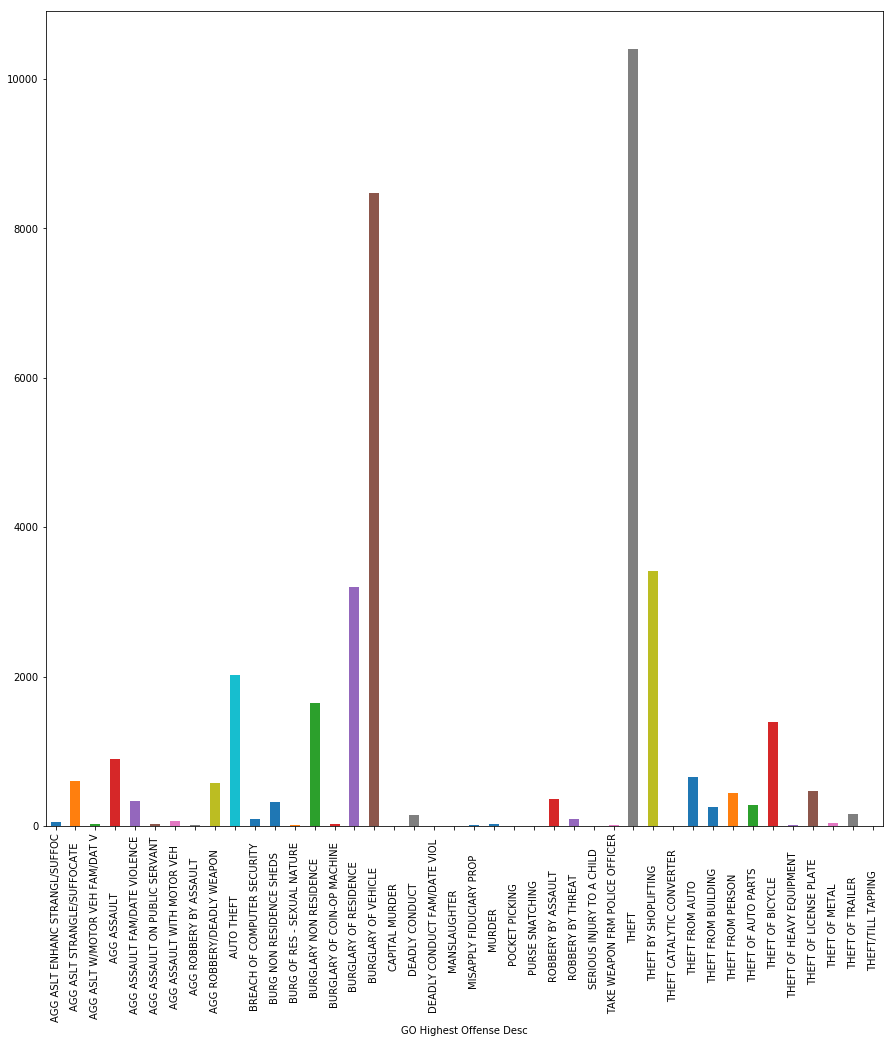

In [63]:
#GO Highest Offense Desc
plt.figure(figsize=(15,15))
df.groupby('GO Highest Offense Desc').size().plot(kind='bar')
plt.show()

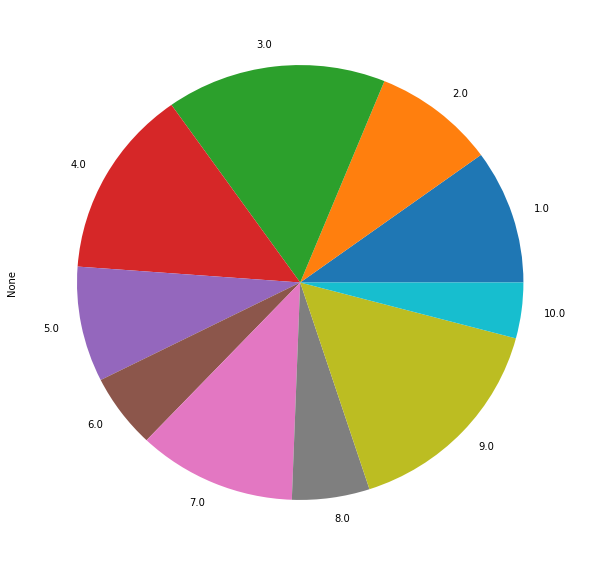

In [64]:
#   Council District
plt.figure(figsize=(10,10))
df.groupby('Council District').size().plot(kind='pie')
plt.show()

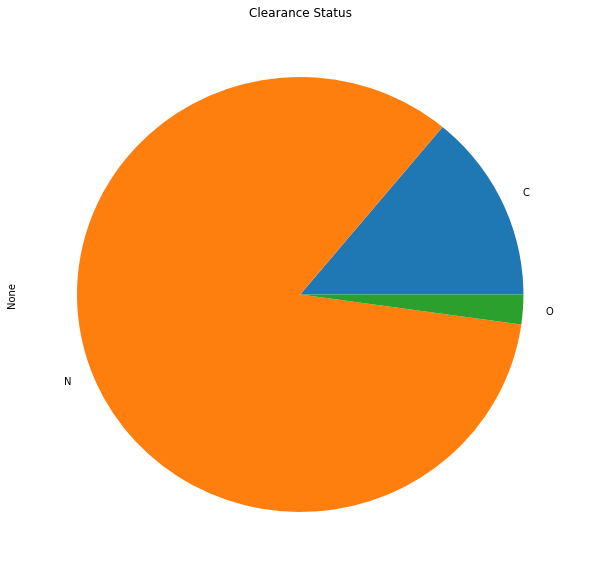

In [65]:
plt.figure(figsize=(10,10))
df.groupby('Clearance Status').size().plot(kind='pie')
plt.title('Clearance Status')
plt.show()

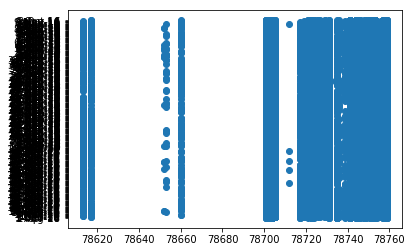

In [310]:
plt.scatter(df['GO Location Zip'],df['GO Report Date'])

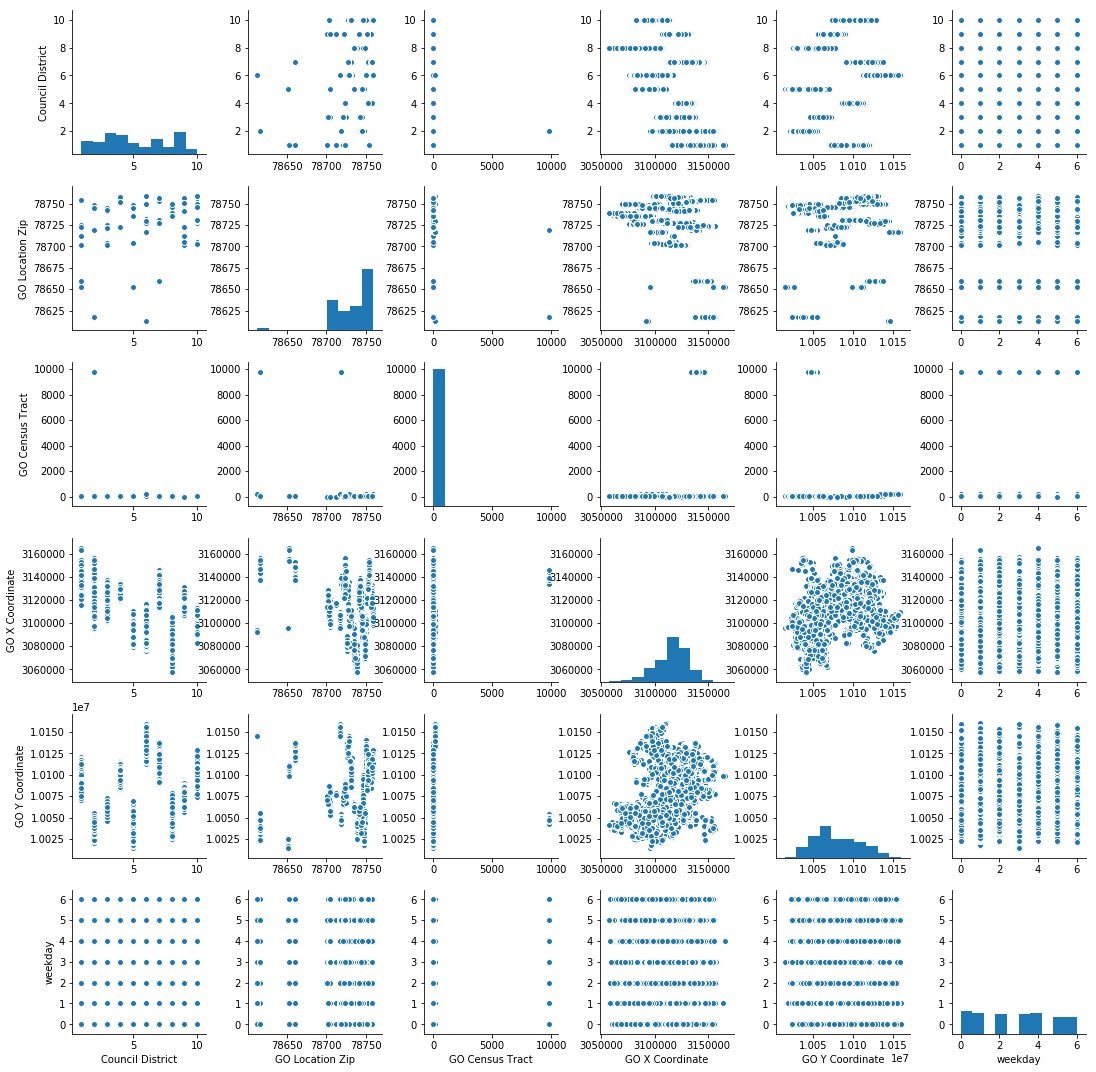

In [317]:
pair = df[['Council District','GO Location Zip','GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate','weekday']]
sns.pairplot(pair);





In [565]:
#mouth nose angle criminal inclusion
#weather data and tax database data
# SHIT RESTAURANT LOCATION DATA via gps coordinates


# predict based on month for theft and create viz for x and y go coordinate
# theft binary classifier weekday/weekend (friday EOD to )

# CAPSTONE PART 3

# TO DO:
## one hot encode/ get dummies of the crime highest column
## go location zip for regression with crime stats

In [66]:
df.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day'],
      dtype='object')

In [68]:
df_crimes = pd.get_dummies(df['GO Highest Offense Desc'])

In [74]:
df_crimes.head()

,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AUTO THEFT,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df_new = pd.concat([df, df_crimes],axis=1)
#df_new
#df_new = df.join(df_crimes)
df_new

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,0,0,0,0,0,0,0,0,0,0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,0,0,0,0,0,0,0,0,0,0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,0,0,0,0,0,0,0,0,0,0
6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,78741,...,0,0,0,0,0,0,0,0,0,0
7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,78741,...,0,0,0,0,0,0,0,0,0,0
8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,78704,...,0,0,0,0,0,0,0,0,0,0
9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,78748,...,0,0,0,0,0,0,0,0,0,0
10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,78758,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_new["Month"]=df["GO Report Date"].map(lambda x: x.split("-")[1])
df_new["Year"]=df["GO Report Date"].map(lambda x: x.split("-")[2])
df_new["Day"]=df["GO Report Date"].map(lambda x: x.split("-")[0])
df_new.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,0,0,0,0,0,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,0,0,0,0,0,0,0,0,0,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,0,0,0,0,0,0,0,0,0,0
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,0,0,0,0,0,0,0,0,0,0


In [290]:
df_new.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day', 'new_date', 'dow',
       'Day_of_Week', 'AGG ASLT ENHANC STRANGL/SUFFOC',
       'AGG ASLT STRANGLE/SUFFOCATE   ', 'AGG ASLT W/MOTOR VEH FAM/DAT V',
       'AGG ASSAULT                   ', 'AGG ASSAULT FAM/DATE VIOLENCE ',
       'AGG ASSAULT ON PUBLIC SERVANT ', 'AGG ASSAULT WITH MOTOR VEH    ',
       'AGG ROBBERY BY ASSAULT        ', 'AGG ROBBERY/DEADLY WEAPON     ',
       'AUTO THEFT                    ', 'BREACH OF COMPUTER SECURITY   ',
       'BURG NON RESIDENCE SHEDS      ', 'BURG OF RES - SEXUAL NATURE   ',
       'BURGLARY NON RESIDENCE        ', 'BURGLARY OF COIN-OP MACHINE   ',
       'BURGLARY OF RESIDENCE         ', 'BURGLARY OF VEHICLE 

In [291]:
corr = df_new.corr()

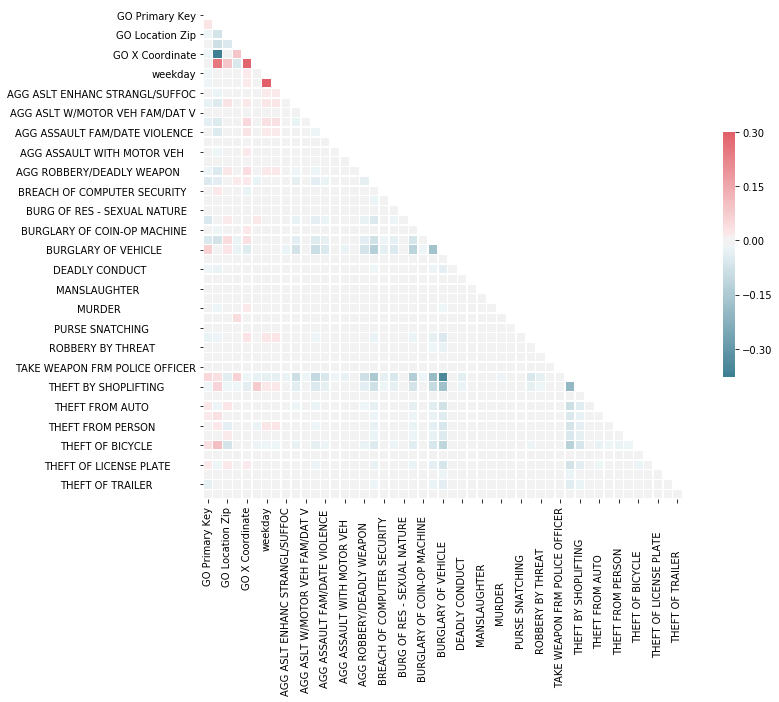

In [292]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [88]:
corr = df.corr()

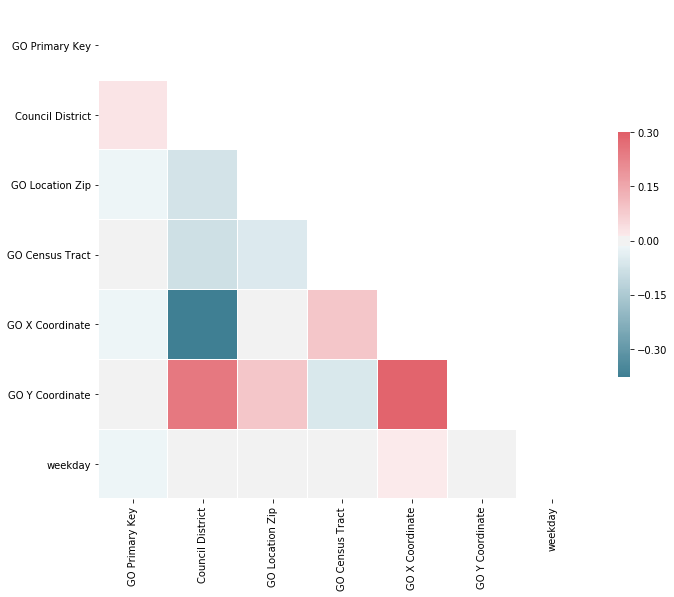

In [89]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [95]:
df_new.reset_index()

,index,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,...,THEFT FROM AUTO,THEFT FROM BUILDING,THEFT FROM PERSON,THEFT OF AUTO PARTS,THEFT OF BICYCLE,THEFT OF HEAVY EQUIPMENT,THEFT OF LICENSE PLATE,THEFT OF METAL,THEFT OF TRAILER,THEFT/TILL TAPPING
0,0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,...,0,0,0,0,0,0,0,0,0,0
1,1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,...,0,0,0,0,0,0,0,0,0,0
2,2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,...,0,0,0,0,0,0,0,0,0,0
3,3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,...,0,0,0,0,0,0,0,0,0,0
4,5,2.016111e+08,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,...,0,0,0,0,0,0,0,0,0,0
5,6,2.016112e+08,3.0,ROBBERY BY ASSAULT,Robbery,1-Jan-16,1601 ROYAL CREST DR ...,N,1-Nov-16,H,...,0,0,0,0,0,0,0,0,0,0
6,7,2.016112e+08,3.0,AGG ASSAULT FAM/DATE VIOLENCE,Agg Assault,1-Jan-16,1600 WICKERSHAM LN ...,C,1-Jan-16,H,...,0,0,0,0,0,0,0,0,0,0
7,8,2.016112e+08,5.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-16,4009 VICTORY DR ...,C,3-Feb-16,D,...,0,0,0,0,0,0,0,0,0,0
8,9,2.016112e+08,5.0,BURGLARY NON RESIDENCE,Burglary,1-Jan-16,811 W SLAUGHTER LN ...,N,4-Feb-16,F,...,0,0,0,0,0,0,0,0,0,0
9,10,2.016113e+08,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-16,8930 GALEWOOD DR ...,C,12-Feb-16,E,...,0,0,0,0,0,0,0,0,0,0


In [169]:
#X = df_new(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'AGG ASLT STRANGLE/SUFFOCATE   ',
       'AGG ASLT W/MOTOR VEH FAM/DAT V', 'AGG ASSAULT                   ',
       'AGG ASSAULT FAM/DATE VIOLENCE ', 'AGG ASSAULT ON PUBLIC SERVANT ',
       'AGG ASSAULT WITH MOTOR VEH    ', 'AGG ROBBERY BY ASSAULT        ',
       'AGG ROBBERY/DEADLY WEAPON     ', 'AUTO THEFT                    ',
       'BREACH OF COMPUTER SECURITY   ', 'BURG NON RESIDENCE SHEDS      ',
       'BURG OF RES - SEXUAL NATURE   ', 'BURGLARY NON RESIDENCE        ',
       'BURGLARY OF COIN-OP MACHINE   ', 'BURGLARY OF RESIDENCE         ',
       'BURGLARY OF VEHICLE           ', 'CAPITAL MURDER                ',
       'DEADLY CONDUCT                ', 'DEADLY CONDUCT FAM/DATE VIOL  ',
       'MANSLAUGHTER                  ', 'MISAPPLY FIDUCIARY PROP       ',
       'MURDER                        ', 'POCKET PICKING                ',
       'PURSE SNATCHING               ', 'ROBBERY BY ASSAULT            ',
       'ROBBERY BY THREAT             ', 'SERIOUS INJURY TO A CHILD     ',
       'TAKE WEAPON FRM POLICE OFFICER', 'THEFT                         ',
       'THEFT BY SHOPLIFTING          ', 'THEFT CATALYTIC CONVERTER     ',
       'THEFT FROM AUTO               ', 'THEFT FROM BUILDING',
       'THEFT FROM PERSON             ', 'THEFT OF AUTO PARTS',
       'THEFT OF BICYCLE              ', 'THEFT OF HEAVY EQUIPMENT',
       'THEFT OF LICENSE PLATE        ', 'THEFT OF METAL',
       'THEFT OF TRAILER', 'THEFT/TILL TAPPING'])



IndentationError: unexpected indent (<ipython-input-169-ac6a515abbb3>, line 2)

In [105]:
y = df_new.index

# DF of simplified crime list

In [165]:

df_crime_simple = pd.get_dummies(df['Highest NIBRS/UCR Offense Description'])

In [166]:

df_crime_simple.head()

,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,0,1
5,1,0,0,0,0,0


In [170]:


df_new_1 = pd.concat([df, df_crime_simple],axis=1)

In [171]:
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,...,Day,new_date,dow,Day_of_Week,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735,...,1,2016-01-01,4,Friday,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753,...,1,2016-01-01,4,Friday,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,N,8-Jan-16,C,78724,...,1,2016-01-01,4,Friday,1,0,0,0,0,0


In [174]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day', 'new_date', 'dow',
       'Day_of_Week', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft'],
      dtype='object')

In [192]:

data1 = df_new_1[['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'Clearance Status', 'Clearance Date', 'GO District',
       'GO Location Zip', 'GO Census Tract', 'GO X Coordinate',
       'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day', 'new_date', 'dow',
       'Day_of_Week', 'Agg Assault', 'Auto Theft', 'Burglary', 'Murder',
       'Robbery', 'Theft']]
                
data1.corr()


,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
GO Primary Key,1.000000,0.027345,-0.016910,-0.003690,-0.015474,-0.000221,-0.015289,-0.015289,-0.050824,-0.051352,-0.083429,0.000208,-0.032311,0.128803
Council District,0.027345,1.000000,-0.071545,-0.078871,-0.377694,0.249068,-0.008057,-0.008057,-0.092619,-0.036223,-0.058279,-0.017245,-0.051471,0.131959
GO Location Zip,-0.016910,-0.071545,1.000000,-0.051265,-0.006244,0.090841,-0.008079,-0.008079,0.024212,0.004868,0.044505,-0.006966,0.010113,-0.052688
GO Census Tract,-0.003690,-0.078871,-0.051265,1.000000,0.090197,-0.055048,-0.004815,-0.004815,-0.015973,0.014914,-0.023171,-0.002220,-0.009731,0.022440
GO X Coordinate,-0.015474,-0.377694,-0.006244,0.090197,1.000000,0.289116,0.014567,0.014567,0.063975,0.018067,0.022134,0.019338,0.050679,-0.079779
GO Y Coordinate,-0.000221,0.249068,0.090841,-0.055048,0.289116,1.000000,-0.004023,-0.004023,-0.008079,-0.024327,0.005090,0.007327,0.003894,0.010644
weekday,-0.015289,-0.008057,-0.008079,-0.004815,0.014567,-0.004023,1.000000,1.000000,0.050661,0.010149,-0.013258,0.006872,0.031133,-0.033418
dow,-0.015289,-0.008057,-0.008079,-0.004815,0.014567,-0.004023,1.000000,1.000000,0.050661,0.010149,-0.013258,0.006872,0.031133,-0.033418
Agg Assault,-0.050824,-0.092619,0.024212,-0.015973,0.063975,-0.008079,0.050661,0.050661,1.000000,-0.060755,-0.101955,-0.008110,-0.043129,-0.397974
Auto Theft,-0.051352,-0.036223,0.004868,0.014914,0.018067,-0.024327,0.010149,0.010149,-0.060755,1.000000,-0.097933,-0.007790,-0.041428,-0.382276


In [212]:
df_new_1.isnull().sum()

GO Primary Key                            0
Council District                         87
GO Highest Offense Desc                   0
Highest NIBRS/UCR Offense Description     0
GO Report Date                            0
GO Location                               0
GO District                               0
GO Location Zip                           0
GO Census Tract                           0
GO X Coordinate                           0
GO Y Coordinate                           0
weekday                                   0
Month                                     0
Year                                      0
Day                                       0
new_date                                  0
dow                                       0
Day_of_Week                               0
Agg Assault                               0
Auto Theft                                0
Burglary                                  0
Murder                                    0
Robbery                         

In [213]:
#df.dropna(subset = ['column_name'])
df_new_1.dropna(subset = ['Council District'],how='all', inplace = True)

In [209]:

#df_new_1.drop('Clearance Date' ,axis=1, inplace=True)
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,...,Day,new_date,dow,Day_of_Week,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,D,78735,19.08,3067322.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,G,78701,11.00,3114957.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,E,78753,18.23,3129181.0,...,1,2016-01-01,4,Friday,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,G,78701,11.00,3113643.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,C,78724,22.08,3146947.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0


In [218]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'GO District', 'GO Location Zip', 'GO Census Tract',
       'GO X Coordinate', 'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day',
       'new_date', 'dow', 'Day_of_Week', 'Agg Assault', 'Auto Theft',
       'Burglary', 'Murder', 'Robbery', 'Theft'],
      dtype='object')

In [337]:
df_new_1.corr()

,GO Primary Key,Council District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate,weekday,dow,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
GO Primary Key,1.000000,0.027345,-0.017033,-0.003685,-0.015427,-0.000248,-0.015301,-0.015301,-0.050776,-0.051412,-0.083201,0.000212,-0.032301,0.128633
Council District,0.027345,1.000000,-0.071545,-0.078871,-0.377694,0.249068,-0.008057,-0.008057,-0.092619,-0.036223,-0.058279,-0.017245,-0.051471,0.131959
GO Location Zip,-0.017033,-0.071545,1.000000,-0.051436,-0.001085,0.093390,-0.008916,-0.008916,0.024720,0.004521,0.044755,-0.007016,0.009971,-0.052909
GO Census Tract,-0.003685,-0.078871,-0.051436,1.000000,0.090562,-0.055172,-0.004842,-0.004842,-0.016003,0.014901,-0.023196,-0.002225,-0.009759,0.022485
GO X Coordinate,-0.015427,-0.377694,-0.001085,0.090562,1.000000,0.288341,0.015451,0.015451,0.063900,0.018298,0.022675,0.019394,0.050686,-0.080278
GO Y Coordinate,-0.000248,0.249068,0.093390,-0.055172,0.288341,1.000000,-0.003792,-0.003792,-0.008341,-0.024370,0.004977,0.007333,0.003880,0.010896
weekday,-0.015301,-0.008057,-0.008916,-0.004842,0.015451,-0.003792,1.000000,1.000000,0.050999,0.009956,-0.013477,0.006870,0.031119,-0.033314
dow,-0.015301,-0.008057,-0.008916,-0.004842,0.015451,-0.003792,1.000000,1.000000,0.050999,0.009956,-0.013477,0.006870,0.031119,-0.033314
Agg Assault,-0.050776,-0.092619,0.024720,-0.016003,0.063900,-0.008341,0.050999,0.050999,1.000000,-0.060743,-0.101874,-0.008112,-0.043141,-0.397526
Auto Theft,-0.051412,-0.036223,0.004521,0.014901,0.018298,-0.024370,0.009956,0.009956,-0.060743,1.000000,-0.098019,-0.007805,-0.041509,-0.382484


In [502]:
df['Council District'] =  df['Council District'].astype('int32')


,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,...,Day,new_date,dow,Day_of_Week,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,D,78735,19.08,3067322.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,G,78701,11.00,3114957.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,E,78753,18.23,3129181.0,...,1,2016-01-01,4,Friday,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,G,78701,11.00,3113643.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,C,78724,22.08,3146947.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0


In [503]:
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,...,Day,new_date,dow,Day_of_Week,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,D,78735,19.08,3067322.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,G,78701,11.00,3114957.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,E,78753,18.23,3129181.0,...,1,2016-01-01,4,Friday,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,G,78701,11.00,3113643.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,C,78724,22.08,3146947.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0


In [216]:
# lets see if the day of the week is correlated to murder
df_new_1['weekday'].corr(df_new_1['Murder'])

0.0068698303121353891

In [338]:
df_new_1['weekday'].corr(df_new_1['Theft'])

-0.033314106533932138

In [222]:
import statsmodels.api as sm # import statsmodels 

/Users/Owner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [356]:
X = df_new_1[['GO Location Zip']]
#X = df_new_1[['Theft']]
y = df_new_1[['Theft']]

model = sm.OLS(X,y).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GO Location Zip   R-squared:                 -154554.623
Model:                            OLS   Adj. R-squared:            -154558.858
Method:                 Least Squares   F-statistic:                -3.649e+04
Date:                Fri, 01 Dec 2017   Prob (F-statistic):               1.00
Time:                        13:18:57   Log-Likelihood:            -4.4031e+05
No. Observations:               36492   AIC:                         8.806e+05
Df Residuals:                   36491   BIC:                         8.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Theft       7.873e+04    260.515    302.216      0.000    7.82e+04    7.92e+04
==============================================================================
Omnibus:                    18793.592   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7320.776
Skew:                           0.950   Prob(JB):                         0.00
Kurtosis:                       1.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
from sklearn import linear_model

In [358]:

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [359]:
predictions = lm.predict(X)
print(predictions)[0:5]

[[ 0.71236466]
 [ 0.7438876 ]
 [ 0.69567605]
 ..., 
 [ 0.72349041]
 [ 0.70587465]
 [ 0.74017902]]


TypeError: 'NoneType' object is not subscriptable

In [360]:
lm.score(X,y)

0.0027993684470580811

In [361]:
# trying logistic regression to classify the zips

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)



In [362]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [363]:
y_pred = LogReg.predict(X_test)

In [364]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[   0, 3128],
       [   0, 7820]])

In [365]:


print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3128
          1       0.71      1.00      0.83      7820

avg / total       0.51      0.71      0.60     10948



/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [393]:
df_new_1.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,...,Day,new_date,dow,Day_of_Week,Agg Assault,Auto Theft,Burglary,Murder,Robbery,Theft
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,D,78735,19.08,3067322.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,G,78701,11.00,3114957.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,E,78753,18.23,3129181.0,...,1,2016-01-01,4,Friday,0,0,0,0,1,0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,G,78701,11.00,3113643.0,...,1,2016-01-01,4,Friday,0,0,0,0,0,1
5,201611148.0,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,8002 TAPO LN ...,C,78724,22.08,3146947.0,...,1,2016-01-01,4,Friday,1,0,0,0,0,0


In [370]:
 df_new_1.dtypes

GO Primary Key                                  float64
Council District                                float64
GO Highest Offense Desc                          object
Highest NIBRS/UCR Offense Description            object
GO Report Date                                   object
GO Location                                      object
GO District                                      object
GO Location Zip                                   int32
GO Census Tract                                 float64
GO X Coordinate                                 float64
GO Y Coordinate                                 float64
weekday                                           int64
Month                                            object
Year                                             object
Day                                              object
new_date                                 datetime64[ns]
dow                                               int64
Day_of_Week                                     

In [371]:
df_new_1.columns

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Highest NIBRS/UCR Offense Description', 'GO Report Date',
       'GO Location', 'GO District', 'GO Location Zip', 'GO Census Tract',
       'GO X Coordinate', 'GO Y Coordinate', 'weekday', 'Month', 'Year', 'Day',
       'new_date', 'dow', 'Day_of_Week', 'Agg Assault', 'Auto Theft',
       'Burglary', 'Murder', 'Robbery', 'Theft'],
      dtype='object')

In [552]:
#creating differentiated data 
df_X = pd.DataFrame(df_new_1, columns = ['GO Primary Key', 'Council District',
        'GO Census Tract', 'weekday', 'Day','GO X Coordinate', 'GO Y Coordinate',
        'dow',  'Agg Assault', 'Auto Theft','Burglary', 'Murder', 'Robbery', 'Theft', ])

#took out 'new_date','Month','GO District',  'GO Location', 'GO Highest Offense Desc','Highest NIBRS/UCR Offense Description',

In [553]:
y = df_new_1['GO Location Zip']

In [554]:
#doing a linear regression using the new dataset....Do i need to TTS here??
X_train, X_test, y_train, y_test = train_test_split(df_X, y,
                                                   test_size=0.33,
                                                    random_state=50)

In [555]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
#scaling test
ss.fit(X_test)
X_test_scaled = ss.transform(X_test)

In [540]:
lr = LogisticRegression()
log_model = lr.fit(df_X, y)
print(log_model.score(df_X, y))


0.167269538529


In [541]:
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.291566548774


In [542]:
lasso = LassoCV(cv = 10)
lasso.fit(X_train_scaled, y_train)

lasso.score(X_test_scaled, y_test)
# 

0.29087377085035249

In [543]:
ridge=RidgeCV() 
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_test_scaled,y_test))

0.291566013273


In [544]:
en=ElasticNet() 
en.fit(X_train_scaled, y_train)
print(en.score(X_test_scaled,y_test))

0.126862718597


In [558]:
# n_estimators determines forrest size
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_params = {
    'n_estimators': [10,15,50],
#    'base_estimator__max_depth':range(2,10),
#    'base_estimator__max_features': ['auto','log2',None]
             }
ada_model = GridSearchCV(ada, param_grid = ada_params)
ada_model.fit(X_train_scaled,y_train)
print('best score:', ada_model.best_score_)
print('best params:',ada_model.best_params_)
print('test score:',ada_model.score(ss.fit_transform(X_test),y_test))

/Users/Owner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


best score: 0.985479978731
best params: {'n_estimators': 10}
test score: 0.674582745163


In [568]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [569]:
print(knn.score(X_test, y_test))

0.716017603587


In [570]:
 df_new_1['GO Location Zip'].value_counts()

78741    3282
78753    3083
78704    2515
78758    2431
78745    2203
78701    2025
78723    2000
78744    1912
78702    1559
78748    1347
78752    1257
78759    1184
78705    1112
78757    1064
78751     900
78746     790
78749     781
78703     656
78729     548
78724     525
78727     524
78731     507
78721     501
78754     403
78613     338
78750     329
78756     323
78717     301
78735     286
78617     273
78722     258
78747     225
78726     217
78660     166
78719     165
78739     147
78736     114
78725      71
78742      57
78730      46
78653      40
78652      16
78712       5
78728       4
78732       1
78737       1
Name: GO Location Zip, dtype: int64

In [574]:
 df_new_1['GO Location Zip'].unique()

array([78735, 78701, 78753, 78724, 78741, 78704, 78748, 78758, 78744,
       78747, 78756, 78759, 78723, 78745, 78749, 78751, 78752, 78731,
       78702, 78722, 78705, 78757, 78721, 78739, 78729, 78613, 78617,
       78746, 78750, 78719, 78703, 78736, 78653, 78727, 78652, 78754,
       78726, 78717, 78660, 78725, 78712, 78730, 78742, 78728, 78732, 78737])

In [549]:
df_new_1['GO Location Zip'].shape

(36492,)

In [550]:
3282/36492 


0.08993752055244986

In [551]:
1/12

0.08333333333333333

# NEXT STEPS:
creating more columns that have # of crimes per district calculation and classifying based on that

In [488]:
df_new_1.dtypes

GO Primary Key                                  float64
Council District                                float64
GO Highest Offense Desc                          object
Highest NIBRS/UCR Offense Description            object
GO Report Date                                   object
GO Location                                      object
GO District                                      object
GO Location Zip                                   int32
GO Census Tract                                 float64
GO X Coordinate                                 float64
GO Y Coordinate                                 float64
weekday                                           int64
Month                                            object
Year                                             object
Day                                              object
new_date                                 datetime64[ns]
dow                                               int64
Day_of_Week                                     